# Case-study: Data Science

**Author**: Jacopo Ventura

**Date**: 24th September 2017

Dataset: HR employee attrition and performance.

Tasks:
1. Import, clean and visualize the data
2. Bulid a predictive model of Employee churn
3. Generate and validate hypothesis of why Employees churn 
4. Build a lookalike model of the users and reason about their groupings

The goal of the project is to predict attrition. In HR termonology, attrition occurs when an employee retires or when the company eliminates his job.

## 1. Import, clean and visualize data

In [1]:
# Import packages for data analysis
import os    
import tarfile
from six.moves import urllib
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# step 1: Import data as Pandas dataframe
data_path='C:/Users/jacopo/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv'
dataset = pd.read_csv(data_path)   # dataset as pandas dataframe

In [3]:
# Visualize info about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

The dataset consists of **1470 entries** with **35 features**. A total number of 26 features are numerical, whereas 9 are categorical. The dataset is complete since **there are no missing data**.

### Descriptive statistics of the dataset

We summarize the descriptive statistics of the dataset using Pandas' describe function.

In [4]:
# Visualize info about data
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# Analyze specific attributes: EmployeeCount, Over18, EmployeeNumber
df_temp = dataset[["EmployeeCount","Over18","EmployeeNumber","StandardHours"]]
df_temp.head()

,EmployeeCount,Over18,EmployeeNumber,StandardHours
0,1,Y,1,80
1,1,Y,2,80
2,1,Y,4,80
3,1,Y,5,80
4,1,Y,7,80


The descriptive statistics of the dataset highlights that the attributes "Employee Count" and "Over 18" have constant values being 1 and "Y" respectively. Furthermore, the attribute "Employee Number" is consists of unique values from 1 to 2068 and represents the ordered number of each employee. Since the goal of this analysis is to predict the Employee attrition, we decide to drop these attributes from the dataframe.  

In [6]:
# Drop attributes from the dataframe
dataset.drop(["EmployeeCount","Over18","EmployeeNumber","StandardHours"],axis = 1, inplace = True)

# Split in attrition YES and NO for plotting
target_feature = dataset["Attrition"]


### Data visualization and first insights

First, we plot the bar plot of Employee attrition, which is the attribute we want to predict.

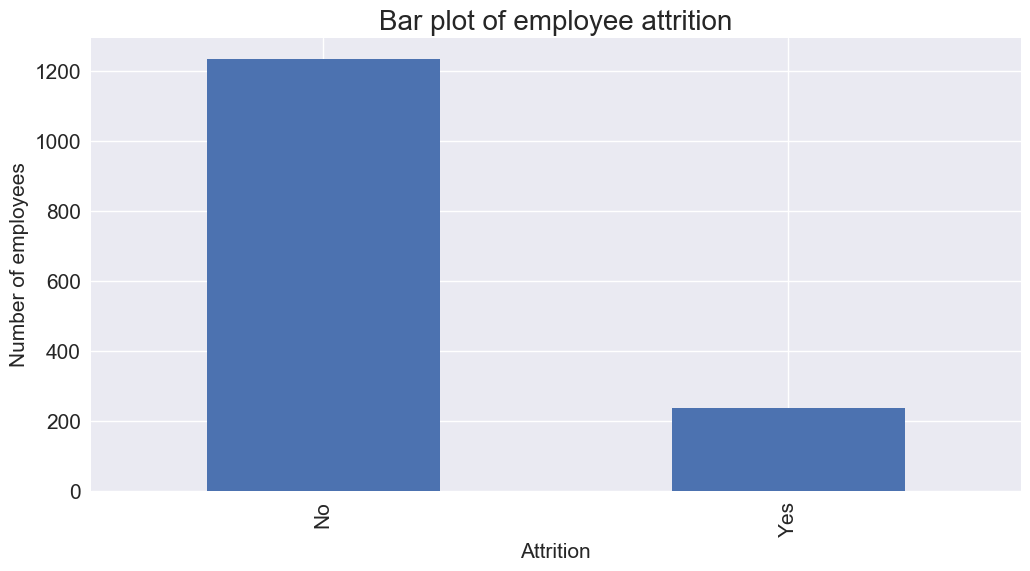

In [7]:
data_attrition_Y = dataset.loc[dataset['Attrition'] == "Yes"]
data_attrition_N = dataset.loc[dataset['Attrition'] == "No"]

plt.figure(num=None, figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k')

target_feature.value_counts().plot(kind='bar')
plt.title('Bar plot of employee attrition',fontsize=20)
plt.xlabel('Attrition',fontsize=15)
plt.ylabel('Number of employees',fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

The histogram of employee attrition shows that ca. 84 % of the employee in the dataset did not churn (Attrition = no), whereas 16 % did churn (Attrition = yes).

We now consider the attributes having continuous values such as distance from home, monthly income, age, and we plot their histograms.  

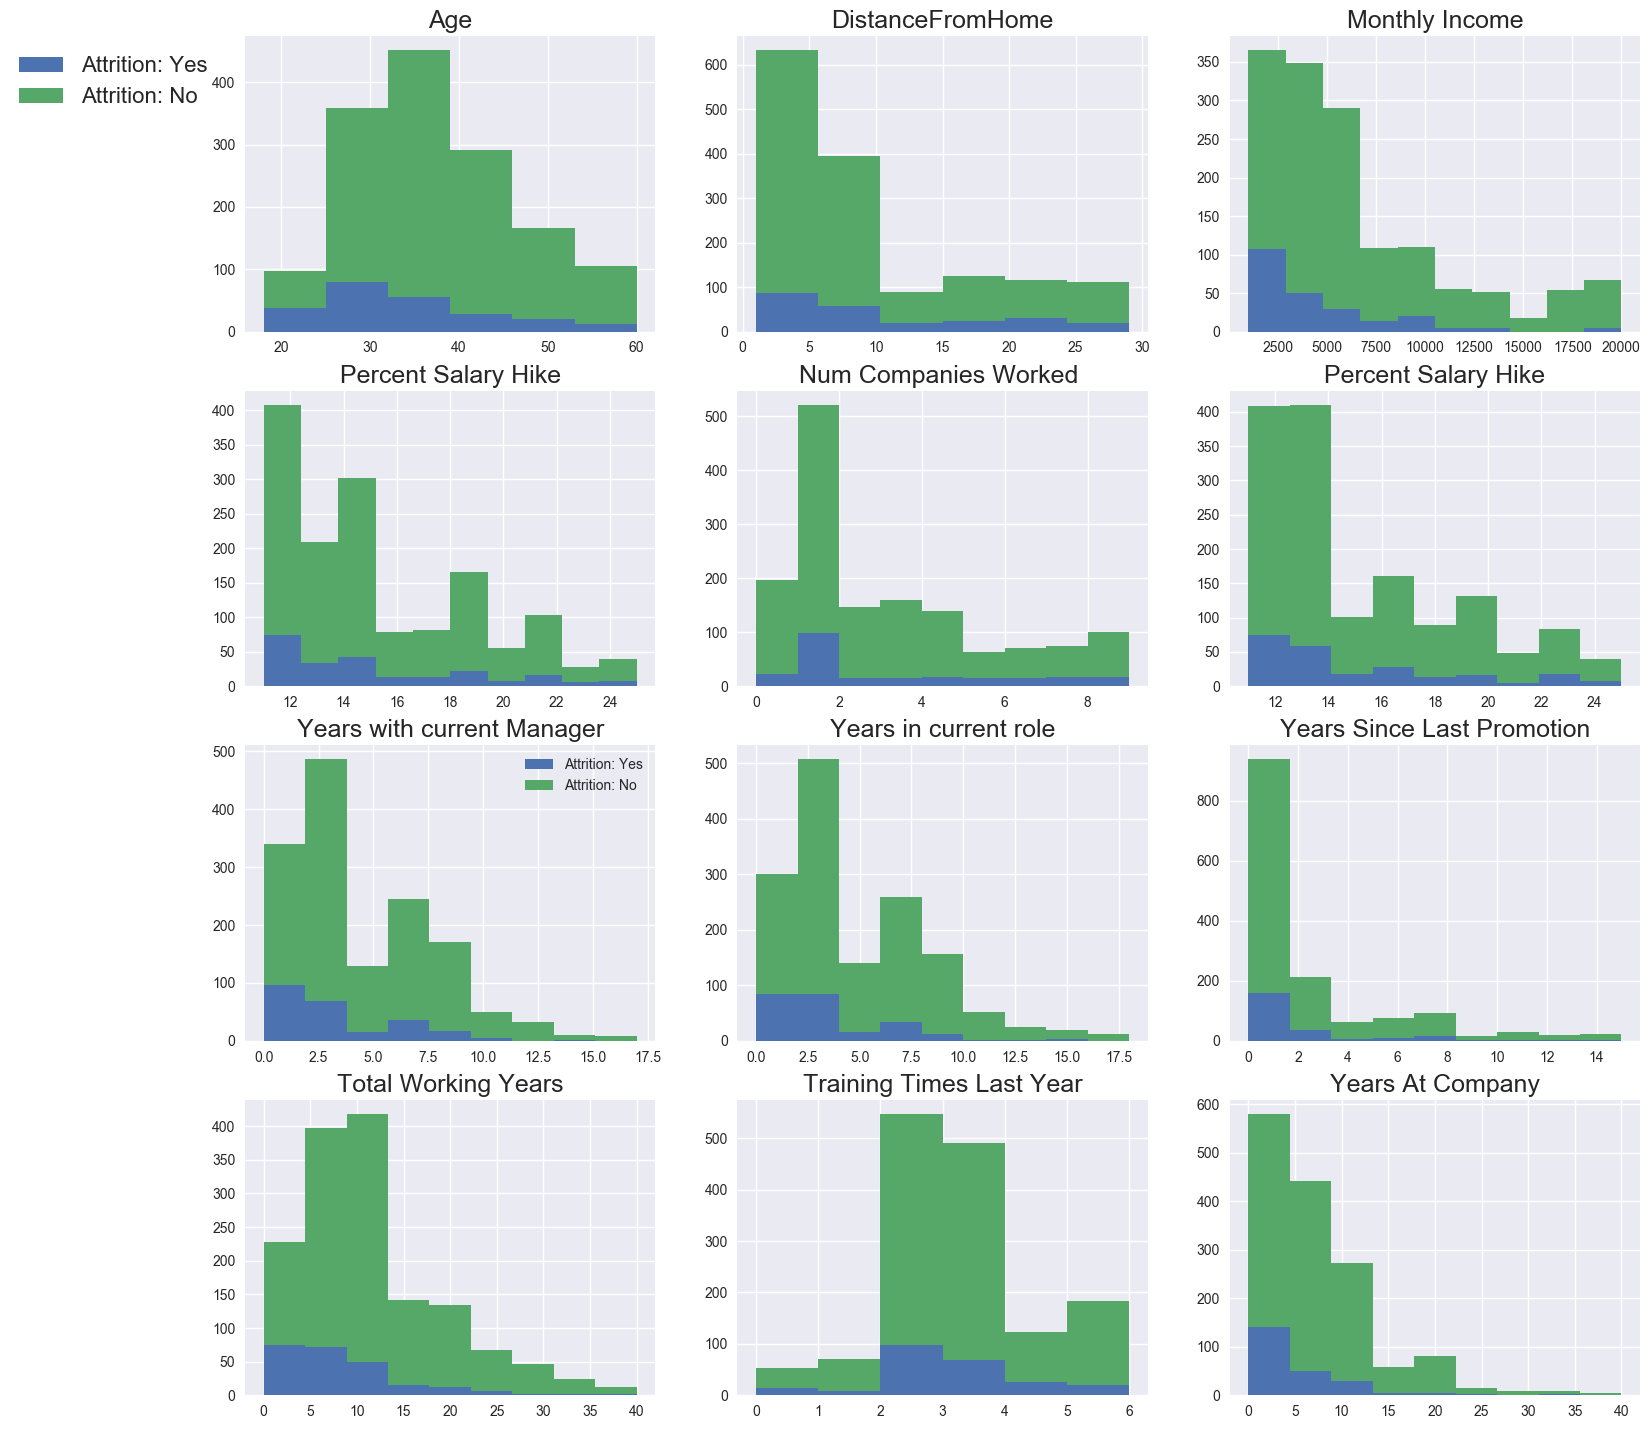

In [8]:
f, axes = plt.subplots(4, 3, figsize=(18, 18), sharex=False, sharey=False, dpi=100, facecolor='w', edgecolor='k')
font_title = 18
lg = ['Attrition: Yes','Attrition: No']

# Plot 1: Age
label = "Age"
axes[0,0].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 6, stacked=True)
axes[0,0].set_title('Age',fontsize=font_title)
axes[0,0].legend(lg,bbox_to_anchor=(-0.6, 1), loc='upper left', ncol=1,fontsize=font_title-2)

# Plot 2: DistanceFromHome
label = "DistanceFromHome"
axes[0,1].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 6, stacked=True)
axes[0,1].set_title('DistanceFromHome',fontsize=font_title)

# Plot 3: MonthlyIncome
label = "MonthlyIncome"
axes[0,2].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 10, stacked=True)
axes[0,2].set_title('Monthly Income',fontsize=font_title)

# Plot 4: HourlyRate
label = "PercentSalaryHike"
axes[1,0].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 10, stacked=True)
axes[1,0].set_title('Percent Salary Hike',fontsize=font_title)

# Plot 5: NumCompaniesWorked
label = "NumCompaniesWorked"
axes[1,1].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 9, stacked=True)
axes[1,1].set_title('Num Companies Worked ',fontsize=font_title)

# Plot 6: PercentSalaryHike
label = "PercentSalaryHike"
axes[1,2].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 9, stacked=True)
axes[1,2].set_title('Percent Salary Hike',fontsize=font_title)

# Plot 7: YearsWithCurrManager
label = "YearsWithCurrManager"
axes[2,0].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 9, stacked=True)
axes[2,0].set_title('Years with current Manager',fontsize=font_title)
axes[2,0].legend(lg)

# Plot 8: YearsInCurrentRole
label = "YearsInCurrentRole"
axes[2,1].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 9, stacked=True)
axes[2,1].set_title('Years in current role',fontsize=font_title)

# Plot 9: YearsSinceLastPromotion
label = "YearsSinceLastPromotion"
axes[2,2].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 9, stacked=True)
axes[2,2].set_title('Years Since Last Promotion',fontsize=font_title)

# Plot 10: TotalWorkingYears
label = "TotalWorkingYears"
axes[3,0].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 9, stacked=True)
axes[3,0].set_title('Total Working Years',fontsize=font_title)

# Plot 11: TrainingTimesLastYear
label = "TrainingTimesLastYear"
axes[3,1].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 6, stacked=True)
axes[3,1].set_title('Training Times Last Year',fontsize=font_title)

# Plot 12: YearsAtCompany
label = "YearsAtCompany"
axes[3,2].hist([data_attrition_Y[label],data_attrition_N[label]], bins = 9, stacked=True)
axes[3,2].set_title('Years At Company',fontsize=font_title)


As we can observe from these histograms, most of the distributions are **right-skewed**.

Let us now consider the categorical attributes such as business travel and work life balance. We generate a set of bar plots to get the first insights on the categories subjected to the highest attrition. In the dataset, some categorical features are expressed by numbers. For example, work life balance is expressed by the set of values [1,2,3,4], which represent the categories [low, good, better, best]. In this part of the data exploration, numerical features representing ratings are treated as categorical and converted to categories according to the database [description](https://community.watsonanalytics.com/discussions/questions/3638/dataset-definition-for-samle-dataset-employee-attr.html)

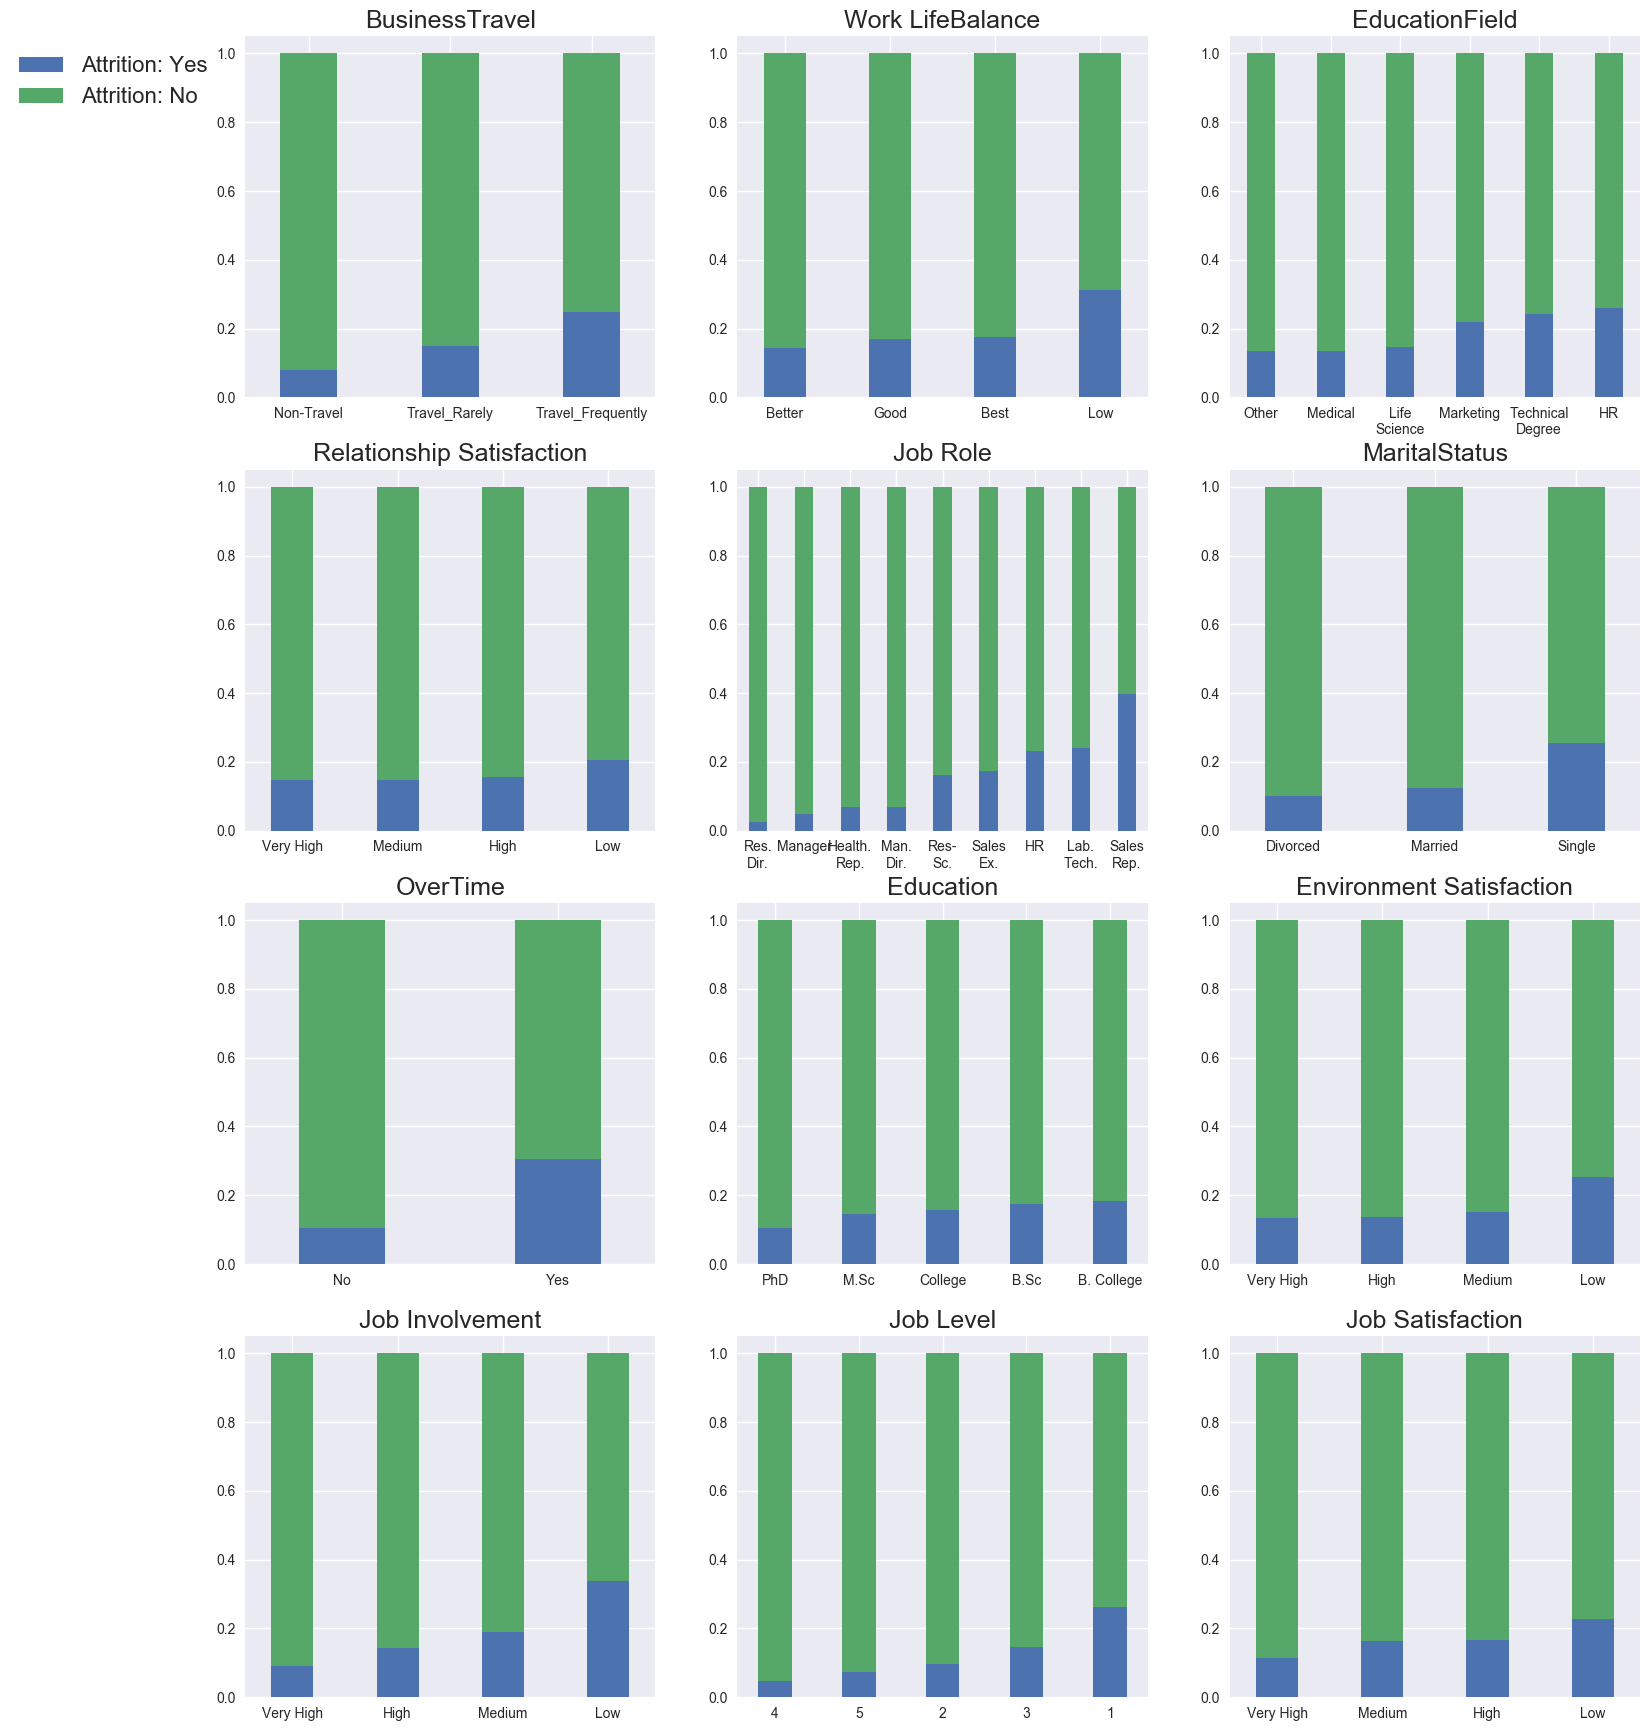

In [9]:
def get_pct_YN(attribute):
    labels = data_attrition_Y[attribute].unique()
    data = []
    pct_Y = []
    for lab in labels:
        d = [sum(data_attrition_Y[attribute]==lab), sum(data_attrition_N[attribute]==lab)]
        data.append(d/sum(d))
        pct_Y.append(d[0]/sum(d))
    idx_sorted = np.argsort(pct_Y)
    data_sorted = []
    labels_sorted = []
    for i in idx_sorted:
        data_sorted.append(data[i])
        labels_sorted.append(labels[i])
    return data_sorted, labels_sorted
    
 

f, axes = plt.subplots(4, 3, figsize=(18, 22), sharex=False, sharey=False, dpi=100, facecolor='w', edgecolor='k')
font_title = 18
bar_width = 0.4


# Plot 1: BusinessTravel
data, label = get_pct_YN("BusinessTravel")
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[0, 0],rot=0, width=bar_width,legend=None)
axes[0,0].set_xticklabels(label)
axes[0,0].set_title('BusinessTravel',fontsize=font_title)
axes[0,0].legend(lg,bbox_to_anchor=(-0.6, 1), loc='upper left', ncol=1,fontsize=font_title-2)

# Plot 2: WorkLifeBalance
label = "WorkLifeBalance" 
data_attrition_Y[label] = data_attrition_Y[label].replace([1,2,3,4], ['Low','Good','Better','Best'])
data_attrition_N[label] = data_attrition_N[label].replace([1,2,3,4], ['Low','Good','Better','Best'])
data, label = get_pct_YN(label)
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[0,1],rot=0, width=bar_width,legend=None)
axes[0,1].set_xticklabels(label)
axes[0,1].set_title('Work LifeBalance',fontsize=font_title)

# Plot 3: EducationField
data, label = get_pct_YN("EducationField")
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[0, 2],rot=0, width=bar_width,legend=None)
axes[0,2].set_xticklabels(['Other',
 'Medical',
 'Life\nScience',
 'Marketing',
 'Technical\nDegree',
 'HR'])
axes[0,2].set_title('EducationField',fontsize=font_title)

# Plot 4: RelationshipSatisfaction
label = "RelationshipSatisfaction"
data_attrition_Y[label] = data_attrition_Y[label].replace([1,2,3,4], ['Low','Medium','High','Very High'])
data_attrition_N[label] = data_attrition_N[label].replace([1,2,3,4], ['Low','Medium','High','Very High'])
data, label = get_pct_YN(label)
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[1,0],rot=0, width=bar_width,legend=None)
axes[1,0].set_xticklabels(label)
axes[1,0].set_title('Relationship Satisfaction',fontsize=font_title)

# Plot 5: JobRole
data, label = get_pct_YN("JobRole")
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[1, 1],rot=0, width=bar_width,legend=None)
axes[1,1].set_xticklabels(['Res.\nDir.',
 'Manager',
 'Health.\nRep.',
 'Man.\nDir.',
 'Res-\nSc.',
 'Sales\nEx.',
 'HR',
 'Lab.\nTech.',
 'Sales\nRep.'])
axes[1,1].set_title('Job Role',fontsize=font_title)


# Plot 6: MaritalStatus
data, label = get_pct_YN("MaritalStatus")
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[1, 2],rot=0, width=bar_width,legend=None)
axes[1,2].set_xticklabels(label)
axes[1,2].set_title('MaritalStatus',fontsize=font_title)

# Plot 7: OverTime
data, label = get_pct_YN("OverTime")
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[2,0],rot=0, width=bar_width,legend=None)
axes[2,0].set_xticklabels(label)
axes[2,0].set_title('OverTime',fontsize=font_title)

# Plot 8: Education
label = "Education"
data_attrition_Y[label] = data_attrition_Y[label].replace([1,2,3,4,5], ['B. College','College','B.Sc','M.Sc','PhD'])
data_attrition_N[label] = data_attrition_N[label].replace([1,2,3,4,5], ['B. College','College','B.Sc','M.Sc','PhD'])
data, label = get_pct_YN(label)
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[2,1],rot=0, width=bar_width,legend=None)
axes[2,1].set_xticklabels(label)
axes[2,1].set_title('Education',fontsize=font_title)

# Plot 9: EnvironmentSatisfaction
label = "EnvironmentSatisfaction"
data_attrition_Y[label] = data_attrition_Y[label].replace([1,2,3,4], ['Low','Medium','High','Very High'])
data_attrition_N[label] = data_attrition_N[label].replace([1,2,3,4], ['Low','Medium','High','Very High'])
data, label = get_pct_YN(label)
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[2,2],rot=0, width=bar_width,legend=None)
axes[2,2].set_xticklabels(label)
axes[2,2].set_title('Environment Satisfaction',fontsize=font_title)


# Plot 10: JobInvolvement
label = "JobInvolvement"
data_attrition_Y[label] = data_attrition_Y[label].replace([1,2,3,4], ['Low','Medium','High','Very High'])
data_attrition_N[label] = data_attrition_N[label].replace([1,2,3,4], ['Low','Medium','High','Very High'])
data, label = get_pct_YN(label)
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[3,0],rot=0, width=bar_width,legend=None)
axes[3,0].set_xticklabels(label)
axes[3,0].set_title('Job Involvement',fontsize=font_title)

# Plot 11: JobLevel
label = "JobLevel"
data_attrition_Y[label] = data_attrition_Y[label].replace([1,2,3,4,5], ['1','2','3','4','5'])
data_attrition_N[label] = data_attrition_N[label].replace([1,2,3,4,5], ['1','2','3','4','5'])
data, label = get_pct_YN(label)
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[3,1],rot=0, width=bar_width,legend=None)
axes[3,1].set_xticklabels(label)
axes[3,1].set_title('Job Level',fontsize=font_title)

# Plot 12: JobSatisfaction
label = "JobSatisfaction"
data_attrition_Y[label] = data_attrition_Y[label].replace([1,2,3,4], ['Low','Medium','High','Very High'])
data_attrition_N[label] = data_attrition_N[label].replace([1,2,3,4], ['Low','Medium','High','Very High'])
data, label = get_pct_YN(label)
pd.DataFrame(data).plot.bar(stacked=True,ax=axes[3,2],rot=0, width=bar_width,legend=None)
axes[3,2].set_xticklabels(label)
axes[3,2].set_title('Job Satisfaction',fontsize=font_title)

The previous plots shows that certain categories have higher attrition than others. For example, low job involvement, low environmental satisfaction, low work like balance and high travel frequency are subjected to higher employee attrition. Interestingly, sales representative jobs have the highest attrition. Finally, single employees have also higher attrition than divorced employees. 

Now, we want to observe how the features are distributed with one another. To do this, we use Seaborn's kdeplot function. 

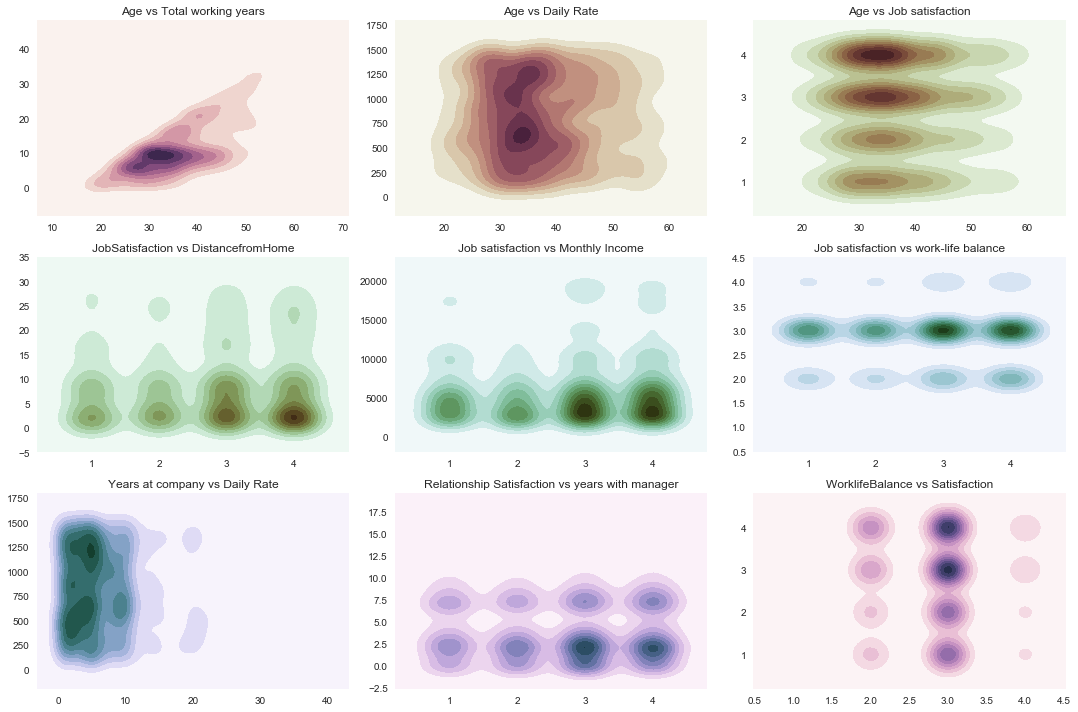

In [10]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = dataset['Age'].values
y = dataset['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0],legend=True)
axes[0,0].set( title = 'Age vs Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = dataset['Age'].values
y = dataset['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age vs Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = dataset['Age'].values
y = dataset['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Age vs Job satisfaction')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = dataset['JobSatisfaction'].values
y = dataset['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'JobSatisfaction vs DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = dataset['JobSatisfaction'].values
y = dataset['MonthlyIncome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Job satisfaction vs Monthly Income')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = dataset['JobSatisfaction'].values
y = dataset['WorkLifeBalance'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Job satisfaction vs work-life balance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = dataset['YearsAtCompany'].values
y = dataset['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company vs Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = dataset['RelationshipSatisfaction'].values
y = dataset['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = dataset['WorkLifeBalance'].values
y = dataset['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance vs Satisfaction')

f.tight_layout()

The previous plots shows how features are distributed. For example, people satisfied at their job tend to work closer to their homes.

### Pearson's r and correlation matrix

During data wrangling, it is useful to calculate the **Pearson's r** coefficient to check eventual linear relations between features. First, let us check how the attrition is related to the other numerical features.

In [11]:
# convert categorical attrition from Y/N to 1/0
dataset["Attrition_num"] = dataset["Attrition"].replace(['Yes','No'], [1,0])


In [12]:
# creating a list of only numerical values
numerical = ['Age', 'Attrition_num', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

corr_matrix = dataset[numerical].corr()
corr_matrix["Attrition_num"].sort_values(ascending=False)

Attrition_num               1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition_num, dtype: float64

As we can see from the previous table, the maximum absolute value of the Pearson's r for the attrition is 0.17 obtained when calculated with total working years. Therefore, the feature attrition is not linearly related to any other numerical feature. 

Let us now check the correlations between each numerical feature of the dataset.

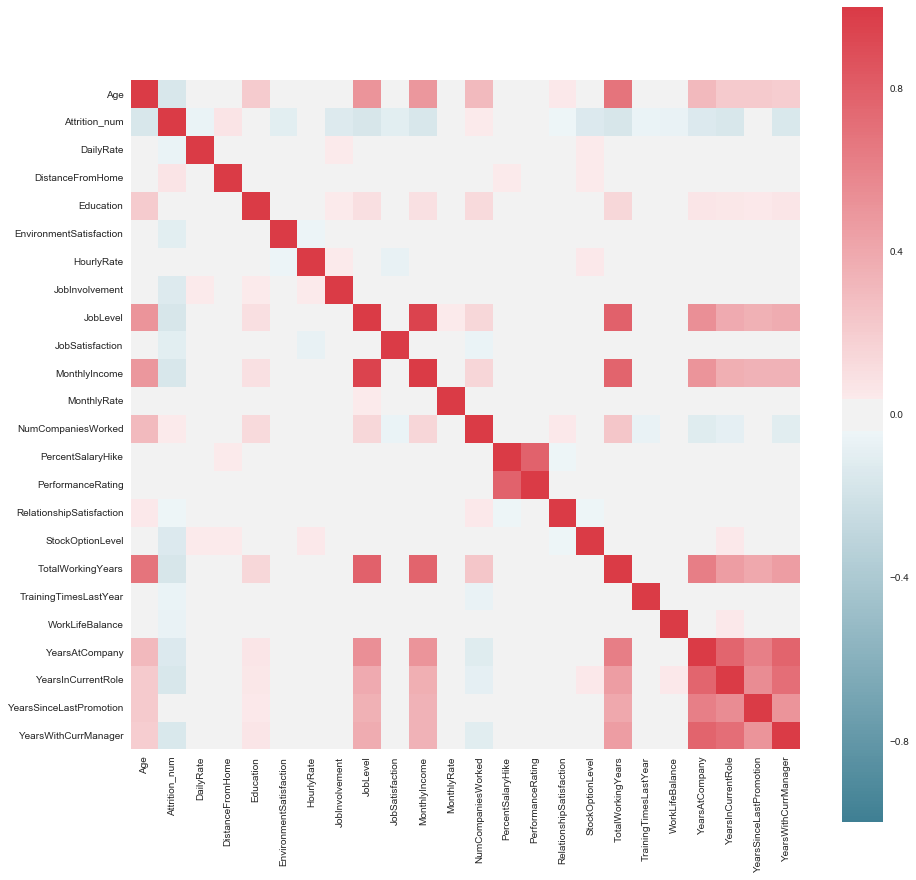

In [13]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, 
            mask=np.zeros_like(corr_matrix, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


The graphical representation of the correlation matrix shows that most of the features are not correlated with any another. Only four features seem to be more correlated than the others: years with manager, years since last promotion, years in current role and years at company. Since features are mostly unrelated, dimensionality reduction is not required.